In [1]:
import requests
import time
import hashlib
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


Definindo a apikey usando Hash MD5: md5(ts+privateKey+publicKey)


In [19]:
PUBLIC_KEY = "0b08b7e93738e4973b80ae94c2986e7d"
PRIVATE_KEY = "292deed8848488aa3574b5eae82f97b0f22da73c"

ts = int(time.time())

hash_md5 = hashlib.md5(f"{ts}{PRIVATE_KEY}{PUBLIC_KEY}".encode()).hexdigest()

url = "http://gateway.marvel.com/v1/public/creators"  #comics / characters / events / series / stories

params = {
    "ts": ts,
    "apikey": PUBLIC_KEY,
    "hash": hash_md5,
    "limit": 30#Maior número que divide 1564 e não sobra nada (92)
    }

response = requests.get(url, params=params)

print(response)

print(response.json())

<Response [200]>
{'code': 200, 'status': 'Ok', 'copyright': '© 2025 MARVEL', 'attributionText': 'Data provided by Marvel. © 2025 MARVEL', 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2025 MARVEL</a>', 'etag': '2bfe8534d327331c2a8c3c43f63ecba6a4c4a7ff', 'data': {'offset': 0, 'limit': 30, 'total': 6112, 'count': 30, 'results': [{'id': 13970, 'firstName': '#O', 'middleName': '', 'lastName': '', 'suffix': '', 'fullName': '#O', 'modified': '2019-12-11T17:10:07-0500', 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/b/40/image_not_available', 'extension': 'jpg'}, 'resourceURI': 'http://gateway.marvel.com/v1/public/creators/13970', 'comics': {'available': 4, 'collectionURI': 'http://gateway.marvel.com/v1/public/creators/13970/comics', 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/8546', 'name': 'Earth X (1999)'}, {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/10492', 'name': 'Paradise X (2002)'}, {'resourceURI': '

In [20]:
df = pd.DataFrame(response.json()['data']['results'])

df.columns

Index(['id', 'firstName', 'middleName', 'lastName', 'suffix', 'fullName',
       'modified', 'thumbnail', 'resourceURI', 'comics', 'series', 'stories',
       'events', 'urls'],
      dtype='object')

In [21]:
df.head(4)

,id,firstName,middleName,lastName,suffix,fullName,modified,thumbnail,resourceURI,comics,series,stories,events,urls
0,13970,#O,,,,#O,2019-12-11T17:10:07-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/1...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 4, 'collectionURI': 'http://gate...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
1,13971,#X,,,,#X,2019-12-11T17:21:29-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/1...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 4, 'collectionURI': 'http://gate...","{'available': 4, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
2,6606,A.R.K.,,,,A.R.K.,2007-01-02T00:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/6606,"{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
3,1168,All Thumbs Creative,,,,All Thumbs Creative,2018-07-24T11:50:20-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/1168,"{'available': 13, 'collectionURI': 'http://gat...","{'available': 13, 'collectionURI': 'http://gat...","{'available': 21, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."


Selecionando a chave "available" dos dicionários Comics, Series, Stories, Events


In [23]:
df["comics.available"] = df["comics"].str["available"]
df["series.available"] = df["series"].str["available"]
df["stories.available"] = df["stories"].str["available"]
df["events.available"] = df["events"].str["available"]

df["participations"] = (
    df["comics.available"]+df["series.available"]+df["stories.available"]+df["events.available"]
)

In [28]:
df["participations"].head(5)

,participations
0,11
1,12
2,0
3,47
4,0


Creatores que tem mais participaçôes


<ipython-input-25-b6cb8b306c13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_criadores.values, y=top_criadores.index, palette="viridis")


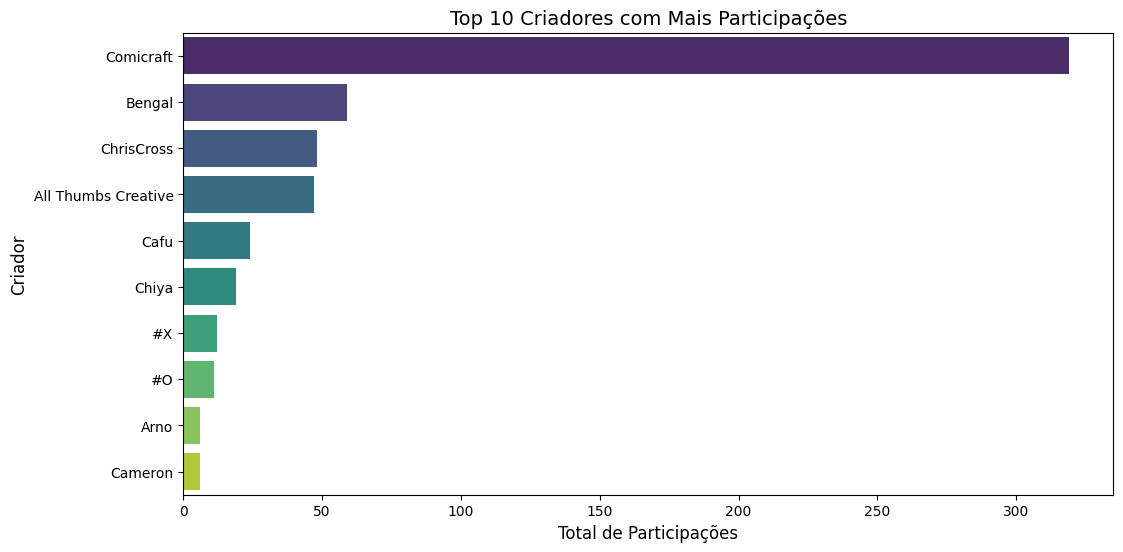

In [25]:
top_criadores = df.groupby("fullName")["participations"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_criadores.values, y=top_criadores.index, palette="viridis")

plt.title("Top 10 Criadores com Mais Participações", fontsize=14)
plt.xlabel("Total de Participações", fontsize=12)
plt.ylabel("Criador", fontsize=12)
plt.show()

Consumindo o endpoint COMICS

In [37]:
PUBLIC_KEY = "0b08b7e93738e4973b80ae94c2986e7d"
PRIVATE_KEY = "292deed8848488aa3574b5eae82f97b0f22da73c"

ts = int(time.time())

hash_md5 = hashlib.md5(f"{ts}{PRIVATE_KEY}{PUBLIC_KEY}".encode()).hexdigest()

url = "http://gateway.marvel.com/v1/public/comics"  #comics / characters / events / series / stories

params = {
    "ts": ts,
    "apikey": PUBLIC_KEY,
    "hash": hash_md5,
    "limit": 2#Maior número que divide 1564 e não sobra nada (92)
    }
response = requests.get(url, params=params)

print(response)

print(response.json())

<Response [200]>
{'code': 200, 'status': 'Ok', 'copyright': '© 2025 MARVEL', 'attributionText': 'Data provided by Marvel. © 2025 MARVEL', 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2025 MARVEL</a>', 'etag': '218eb62448a5ec73cecb6acf5c4f0fcec5437add', 'data': {'offset': 0, 'limit': 2, 'total': 63758, 'count': 2, 'results': [{'id': 82967, 'digitalId': 0, 'title': 'Marvel Previews (2017)', 'issueNumber': 0, 'variantDescription': '', 'description': '', 'modified': '2019-11-07T08:46:15-0500', 'isbn': '', 'upc': '75960608839302811', 'diamondCode': '', 'ean': '', 'issn': '', 'format': '', 'pageCount': 112, 'textObjects': [], 'resourceURI': 'http://gateway.marvel.com/v1/public/comics/82967', 'urls': [{'type': 'detail', 'url': 'http://marvel.com/comics/issue/82967/marvel_previews_2017?utm_campaign=apiRef&utm_source=0b08b7e93738e4973b80ae94c2986e7d'}], 'series': {'resourceURI': 'http://gateway.marvel.com/v1/public/series/23665', 'name': 'Marvel Previews (2017 - Pr

In [38]:
df = pd.DataFrame(response.json()['data']['results'])

df.columns

df.head(3)

,id,digitalId,title,issueNumber,variantDescription,description,modified,isbn,upc,diamondCode,...,collections,collectedIssues,dates,prices,thumbnail,images,creators,characters,stories,events
0,82967,0,Marvel Previews (2017),0,,,2019-11-07T08:46:15-0500,,75960608839302811,,...,[],[],"[{'type': 'onsaleDate', 'date': '2099-10-30T00...","[{'type': 'printPrice', 'price': 0}]",{'path': 'http://i.annihil.us/u/prod/marvel/i/...,[],"{'available': 1, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate..."
1,82965,0,Marvel Previews (2017),0,,,2019-08-21T17:11:27-0400,,75960608839302611,JUL190068,...,[],[],"[{'type': 'onsaleDate', 'date': '2099-08-28T00...","[{'type': 'printPrice', 'price': 0}]",{'path': 'http://i.annihil.us/u/prod/marvel/i/...,[],"{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate..."


In [ ]:
selected_columns = [
        "id",
        "name",
        #"description",
        "modified",
        "comics.available",
        "comics.returned",
        "series.available",
        "series.returned",
        "stories.available",
        "stories.returned",
        "events.available",
        "events.returned"
    ]

dataset= []

for rounds in range(1, 2):
  params["offset"] = rounds
  response = requests.get(url, params=params)
  dataset.extend(response.json()["data"]["results"])

df = pd.json_normalize(dataset)[selected_columns]
df = pd.DataFrame(df)

print(df.head(200))


response = requests.get(url, params=params)

         id                        name                  modified  \
0   1017100                A-Bomb (HAS)  2013-09-18T15:54:04-0400   
1   1009144                      A.I.M.  2013-10-17T14:41:30-0400   
2   1010699                 Aaron Stack  1969-12-31T19:00:00-0500   
3   1009146  Abomination (Emil Blonsky)  2014-06-27T19:39:07-0400   
4   1016823      Abomination (Ultimate)  2012-07-10T19:11:52-0400   
..      ...                         ...                       ...   
87  1011778    Baron Mordo (Karl Mordo)  2021-08-12T22:48:49-0400   
88  1009169              Baron Strucker  2015-04-14T18:50:25-0400   
89  1009170  Baron Zemo (Heinrich Zemo)  2017-08-24T12:46:19-0400   
90  1010906    Baron Zemo (Helmut Zemo)  2016-02-03T16:47:48-0500   
91  1011137              Baroness S'Bak  1969-12-31T19:00:00-0500   

    comics.available  comics.returned  series.available  series.returned  \
0                  4                4                 2                2   
1                 5

In [ ]:
df["modified"] = df["modified"].str.split("-").str[:2].str.join("-")

In [ ]:
df

,id,name,modified,comics.available,comics.returned,series.available,series.returned,stories.available,stories.returned,events.available,events.returned
0,1017100,A-Bomb (HAS),2013-09,4,4,2,2,7,7,0,0
1,1009144,A.I.M.,2013-10,53,20,36,20,57,20,0,0
2,1010699,Aaron Stack,1969-12,14,14,3,3,27,20,0,0
3,1009146,Abomination (Emil Blonsky),2014-06,58,20,28,20,68,20,1,1
4,1016823,Abomination (Ultimate),2012-07,2,2,2,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
87,1011778,Baron Mordo (Karl Mordo),2021-08,23,20,13,13,24,20,1,1
88,1009169,Baron Strucker,2015-04,48,20,21,20,55,20,1,1
89,1009170,Baron Zemo (Heinrich Zemo),2017-08,38,20,24,20,40,20,1,1
90,1010906,Baron Zemo (Helmut Zemo),2016-02,36,20,18,18,38,20,0,0


In [ ]:
df.columns

Index(['id', 'name', 'modified', 'comics.available', 'comics.returned',
       'series.available', 'series.returned', 'stories.available',
       'stories.returned', 'events.available', 'events.returned'],
      dtype='object')

In [ ]:
df["modified"] = df['modified']

In [ ]:
df

,id,name,modified,comics.available,comics.returned,series.available,series.returned,stories.available,stories.returned,events.available,events.returned
0,1017100,A-Bomb (HAS),2013-09,4,4,2,2,7,7,0,0
1,1009144,A.I.M.,2013-10,53,20,36,20,57,20,0,0
2,1010699,Aaron Stack,1969-12,14,14,3,3,27,20,0,0
3,1009146,Abomination (Emil Blonsky),2014-06,58,20,28,20,68,20,1,1
4,1016823,Abomination (Ultimate),2012-07,2,2,2,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
179,1009169,Baron Strucker,2015-04,48,20,21,20,55,20,1,1
180,1009170,Baron Zemo (Heinrich Zemo),2017-08,38,20,24,20,40,20,1,1
181,1010906,Baron Zemo (Helmut Zemo),2016-02,36,20,18,18,38,20,0,0
182,1011137,Baroness S'Bak,1969-12,1,1,1,1,1,1,1,1
